# 18 - Heterogeneous Treatment Effects and Personalization
 
## From Predictions to Causal Inference
 
17장에서는 기계학습에 관련된 내용을 간략히 다루었습니다. 기계학습 모델은 조건부 기대 함수 $E[Y|X]$를 예측합니다. 알려진 입력 $X$(예: 영어 문장, 이달의 매출, 뇌 스캔 이미지)로부터 잘 정의된 출력 $Y$(예: 일본어 문장, 다음달 매출, 암 진단)으로 매핑할때 매우 유용합니다. 기계학습을 실제 문제에 적용하려면 $E[Y|X]$를 추정하는 문제(예측 문제)로 프레임화해야 합니다. 17장에서는 예시로 고객 확보 문제를 다뤄 봤습니다. 고객의 특징을 통해 수익성 기댓값 $E[NetValue|Age, Income, Region]$를 예측했습니다. 기계학습 모델로 수익성에 따라 고객과 선별적으로 계약할 수 있는 정책을 만들게 해주어 매우 유용했습니다. 여기서 핵심은 수익성을 잘 예측하는 모델을 만드는 것입니다.

예측값을 사용하는 방법은 이미 생성된 데이터에서 고객을 선별한다는 의미에서 수동적인 대응입니다. 고객으로부터 얻을 수 있는 수익인 "순이익"은 마치 바꿀 수 없는 주어진 값처럼 생각합니다. 따라서 순이익을 추정하는 것이 우리가 할 수 있는 전부였습니다. 하지만 이는 사실이 아닙니다. 회사는 순이익을 높이기 위해 다양한 노력(가격 할인, 멋진 광고 등)을 할 수 있습니다. 즉, 회사는 데이터가 생성 프로세스에 영향을 줍니다. 실무에서 일하는 데이터 사이언티스트는 비즈니스 지표(수익성, 비용, 판매량 등)을 최적화하기 위한 방법을 제시할 필요가 있습니다.

실제로 우리는 수동적인 관찰자가 아니며 $E[Y|X]$ 추정은 일부분에 불과합니다. 여기서 인과추론이 필요합니다. 조건부 기대 함수에 `treatment`를 추가하려 합니다. `treatment`는 데이터 생성 과정에 대한 우리의 참여를 모델링합니다.

$$
E[Y|X, T]
$$
 
`feature` $X$와 `treatment`(처치) $T$는 구분해야 합니다. 모두 `outcome` $Y$에 영향을 주지만, $T$는 제어할 수 있다는 점에서 $X$와 다릅니다. 예를 들어 $Y$가 오늘의 매출이라 해봅시다. $X$는 제어할 수 없는 전날 평균 매출과 같은 변수입니다. 반면 $T$는 가격, 재고량, 광고와 같이 매출을 위해 개입할 수 있는 변수를 의미합니다. 인과추론의 목표는 주어진 $X$에서 $T$와 $Y$ 사이의 인과관계를 추정하는 것입니다. 이렇게 하고 나면 $T$를 최적화해 최적 $Y$를 얻을 수 있습니다.
 
$$
\underset{T}{argmax} \ E[Y|X, T]
$$
 
1부에서는 교육의 가치와 같은 규범적인 질문에 대답하려 했습니다. 법 개정이 흡연율을 낮출까요? 긍정적인 사고방식은 학업 성취도를 높일까요? 음주가 사망률에 미치는 영향은 얼마나 큰가요? 이러한 질문은 세상이 어떻게 돌아가는지 이해할 수 있게 해준다는 점에서 흥미롭습니다. 물론 실용적인 목적도 있습니다. 만약 학교 교육이 수입에 얼마나 많은 영향을 주는지 알고 있다면 교육비에 지출할 비용을 합리적으로 결정할 수 있습니다. 수학적으로는 학교 교육의 영향을 추정하여 이를 최적화하는 것과 같습니다. 

$$
\underset{Educ}{argmax} \ E[Income|X, Educ]
$$

1부에서는 처치가 전반적으로 효과적이었는지 답변했습니다. 예를 들어 일반적으로 교육에 투자하는 것이 좋은 생각인지 알고 싶었습니다. $X$는 교란 변수를 포함할 수 있으며 $X$를 설명하거나 통제할 수 있을 때만 인과효과를 알 수 있었습니다. $X$는 인과효과의 분산을 줄이는 역할을 하기도 했습니다. $X$가 $Y$의 좋은 예측 변수라면 $X$로 $Y$의 분산을 설명해 인과효과를 더 분명하게 만들 수 있습니다.
 
이제 더 재미있어집니다. 우리는 평균 처치 효과 이상을 원합니다. `treatment`는 특정 사람에 긍정적인 효과를 주는 반면 다른 사람들에게는 영향을 주지 않습니다. `feature` $X$는 `unit`을 정의하는데, 각 `unit`은 `treatment`에 다르게 반응합니다. 결국 `treatment`에 잘 반응하는 사람에 집중하여 효율을 높이고 싶습니다. 즉, 평균 처치 효과보다는 조건부 처치 효과를 구하고자 합니다.

## From ATE to CATE
 
1부에서는 주로 평균 처치 효과를 추정했습니다.

$$
E[Y_1−Y_0]
$$
 
처치가 연속일 경우 아래와 같습니다.
 
$$
E[y'(t)]
$$
 
$y'(t)$는 `outcome`의 `treatment`에 대한 도함수입니다. `ATE`(average treatment effect, 평균 처치 효과)는 인과추론의 기본으로 `treatment`의 일반적인 효과를 알려줍니다. `ATE`는 어떠한 프로그램을 평가하는 유용한 도구며 전체를 대상으로 개입해야 하는지 알려줍니다. 국가 교육이나 보건 프로그램에 인과추론을 활용하는 것처럼 회사에서 신제품 출시 효과를 파악하는 데 사용할 수 있습니다. `ATE`는 처치해야 하는지 결정하는 데 유용합니다.

이제부터 다른 유형의 결정을 하려 합니다. 누구에게 `treatment`를 적용해야 할까요? 즉, 개인에 관한 결정이 필요합니다. 특정 `unit`에게만 `treatment`를 적용하는 것이 효과적일 수 있기 때문입니다. 즉, `treatment`를 개인화하려고 하며, `CATE`(conditional average treatment effect, 조건부 평균 처치 효과)를 추정하고자 합니다.

$$
E[Y_1−Y_0 | X] \ \text{or} \ E[y'(t)|X]
$$
 
$X$로 조건화하는 것은 `unit`에 따라 처치 효과가 달라질 수 있음을 의미합니다. 다시 말하지만, 모든 사람에게 처치 효과가 다르며 이러한 이질성을 활용하고자 합니다. 적합한 `unit`만 처치하거나(이항 분포), 각 `unit`에 대한 최적 처치량(연속 분포)을 파악하고자 합니다.
 
개별 고객의 대출을 결정하는 은행을 생각해봅시다. 모든 사람에게 많은 대출을 승인하는 것은 좋은 생각이 아닙니다. 개인에 따라 처치(대출 금액)을 다르게 해야 합니다. 고객 신용 점수($X$)에 따라 적절한 대출 한도를 정할 수 있습니다. 물론 큰 기관에서만 개인화가 가능한 건 아닙니다. 일 년 중 어떤 요일에 장사해야 할까요? 제품의 가격은 얼마로 해야 할까요? 개인은 얼마나 오래 운동해야 할까요?

이렇게 생각해 봅시다. 당신은 가격, 할인, 대출 등 많은 고객 데이터를 가지고 있습니다. 고객별로 다른 할인을 제공하는 등 처치를 개인화하려고 합니다.

![img](./data/img/causal-model/customers.png)
 
개인화를 위해서는 고객을 그룹화해야 합니다. 처치에 다르게 반응하는 그룹을 만들어 봅시다. 예를 들면 할인에 잘 반응하는 고객을 구별합니다. 처치에 대한 고객의 반응은 조건부 처치 효과 $\frac{\delta Y}{ \delta T}$로 주어집니다. 고객별로 처치 효과를 그룹화할 수 있으며, 아래 그림과 같이 데이터를 나눌 수 있습니다.
 
![img](./data/img/causal-model/elast-partition.png)
 
구역마다 처치 효과와 탄력성을 추정하는 것은 정말 멋질 일입니다. 탄력성은 $T$와 $Y$ 사이의 기울기입니다. 탄력성(기울기)이 다른 구역을 나눌 수 있다면 해당 구역 내 개인이 처치에 대한 반응이 다르다는 것을 의미합니다.
 
![img](./data/img/causal-model/elast-split.png)
 
단순히 $Y$를 예측하는 것에서 벗어나 개별 `unit`에 대해 $Y$에 대한 $T$의 도함수 $\frac{\delta Y}{ \delta T}$를 예측하려 합니다. $Y$는 아이스크림 판매량 $T$는 아이스크림 가격, `unit` $i$는 하루라고 해봅시다. 도덕적이지는 않지만, 아이스크림의 가격을 매일 바꾼다고 해봅시다. $\frac{\delta Sales}{ \delta Price}$가 **낮은** 날을 찾는다면 매출을 거의 그대로 유지하면서 **가격 인상**이 가능합니다. 휴가철에 아이스크림 가격이 올라가는 것처럼요. 요점은 가격 탄력성 측면에서 날짜를 구분하는 것이 유용하다는 것입니다. 탄력성이 최적 가격을 설정하는 방법에 대한 기반이 되기 때문입니다.

실제로 탄력성을 구하기는 까다롭습니다. 탄력성을 직접 확인할 수 없기 때문입니다. 탄력성을 볼 수 없다면 어떻게 예측할 수 있을까요? 매우 좋은 지적입니다. 일반적으로 탄력성은 `unit`별로 알 방법이 없습니다. 이해하기 어려운 개념이기도 합니다. 우리는 변화율보다는 값 자체를 생각하는 것에 익숙합니다. 탄력성을 잘 이해하기 위한 작은 트릭이 있습니다. 각 `unit`이 $Y_i$와 개별 탄력성 $\frac{\delta Y_i}{\delta T_i}$을 가지고 있다고 생각해봅시다. 탄력성은 $Y$가 $T$에 따라 얼마나 변하는지 알려주는 것으로 이에 해당하는 기울기 계수 $\frac{\delta Y}{ \delta T}_i$가 존재한다고 할 수 있습니다. 아이스크림 예제에서는 매일의 판매 가격에 대한 기울기를 생각합니다.
 
![img](./data/img/causal-model/elasticity.png)
 
물론 개별 기울기는 알 방법은 없습니다. 개별 기울기를 구하기 위해서는 같은 `unit`에 대해 다른 가격일 때 판매량이 어떻게 변하는지 알고 있어야 하기 때문입니다.
 
$$
\frac{\delta Y_i}{ \delta T_i} \approx \frac{Y(T_i) - Y(T_i + \epsilon)}{T_i - (T_i + \epsilon)}
$$
 
이는 인과추론의 근본적인 문제입니다. 같은 `unit`에 다른 `treatment`를 적용할 수 없습니다. 어떻게 해야 할까요?

## Predicting Elasticity
 
상황이 복잡해졌습니다. 우리는 측정할 수 없는 $\frac{\delta Y_i}{ \delta T_i}$를 예측해야 합니다. 기계학습을 사용해 직접 구할 수 없는 값입니다. 하지만 $\frac{\delta Y_i}{ \delta T_i}$는 간접적으로 알 수 있습니다.

선형회귀를 사용해 봅시다.

![img](./data/img/causal-model/linear-fix.png)
 
아래와 같은 선형 회귀에 데이터를 적합 시킨다고 생각해 봅시다.

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + e_i
$$
 
`treatment`로 미분하면 아래와 같습니다.

$$
\frac{\delta y_i}{\delta t_i} = \beta_1 
$$
 
선형 회귀로 $\hat{\beta_1}$를 얻을 수 있으므로 **측정할 수 없는 탄력성을 예측할 수 있습니다.** 하지만 이는 단순한 예측입니다. 모든 사람에 대한 탄력성($\hat{\beta_1}$)을 나타냅니다. 우리는 한발 더 나아가고자 합니다. $\hat{\beta_1}$는 `ATE`지 `CATE`가 아닙니다. `ATE`는 모든 사람에 대해 같으므로 `treatment`에 따른 반응도로 그룹화하는 작업에 도움이 되지 않습니다. 수식을 아래와 같이 바꾸어 봅시다.

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 t_i X_i  + e_i
$$
 
그러면 아래와 같이 탄력성을 예측할 수 있습니다.

$$
\widehat{\frac{\delta y_i}{\delta t_i}} = \hat{\beta_1} + \hat{\beta_3}X_i
$$
 
$\beta_3$는 `feature` $X$에 대한 벡터 계수입니다. 이제 $X_i$에 따라 서로 다른 탄력성을 구할 수 있습니다. 회귀 분석으로 `CATE` $E[y'(t)|X]$를 추정할 수 있습니다.

마침내 무엇인가 해내고 있습니다. 위 모델로 개인에 대한 탄력성 예측을 할 수 있습니다. 또한, 예측 결과로 그룹을 나눌 수 있습니다. 예측 탄력성이 높은 `unit`을 하나의 그룹으로 만들 수 있으며, 탄력성이 낮은 경우도 마찬가지입니다. `treatment`에 반응하는 정도에 따라 그룹을 나눌 수 있습니다.
 
이론은 충분합니다. 이제 아이스크림 데이터를 사용해 직접 탄력성 모델을 만들어 보겠습니다. 각 `unit` $i$는 하루입니다. 하루 별로 평일/주말(`weekday`), 생산 비용(`cost`), 평균 온도(`temp`)를 알고 있습니다. 이는 `feature` $X$가 될 것입니다. 데이터는 `treatment`인 가격(`price`), `outcome`인 판매량(`sales`)을 포함합니다. 데이터는 무작위화 되어 편향이 없다고 가정합니다.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [2]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
print(prices_rnd.shape)
prices_rnd.head()

(5000, 5)


,temp,weekday,cost,price,sales
0,25.8,1,0.3,7,230
1,22.7,3,0.5,4,190
2,33.7,7,1.0,5,237
3,23.0,4,0.5,5,193
4,24.4,1,1.0,3,252


목표를 정리해봅시다. 우리의 목표는 판매량을 최대로 하기 위해 `feature`로 정의된 날짜별로 `price`를 결정하는 것입니다. 따라서 `treatment effect heterogeneity model`(처치 효과 이질성 모델)은 판매량을 얼마나 올려주는지 알려줘야 합니다. 먼저 데이터를 훈련 데이터와 테스트 데이터로 나눕니다.

In [3]:
np.random.seed(123)
train, test = train_test_split(prices_rnd)

훈련 데이터로 가격 탄력성을 구분하는 모델을 만듭니다. 단순히 가격 탄력성을 예측하는 모델을 만들겠습니다. 정확히 어떻게요? 먼저 아래와 같은 선형 모델을 사용합니다.

$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2}X_i + e_i
$$
 
매개 변수로 탄력성이 어떨지 알 수 있습니다.

In [4]:
m1 = smf.ols("sales ~ price + temp+C(weekday)+cost", data=train).fit()
m1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,186.7113,1.770,105.499,0.000,183.241,190.181
C(weekday)[T.2],-25.0512,0.924,-27.114,0.000,-26.863,-23.240
C(weekday)[T.3],-24.5834,0.901,-27.282,0.000,-26.350,-22.817
C(weekday)[T.4],-24.3807,0.897,-27.195,0.000,-26.138,-22.623
C(weekday)[T.5],-24.9036,0.894,-27.850,0.000,-26.657,-23.150
C(weekday)[T.6],-24.0921,0.903,-26.693,0.000,-25.862,-22.323
C(weekday)[T.7],-0.8635,0.888,-0.972,0.331,-2.605,0.878
price,-2.7515,0.106,-25.970,0.000,-2.959,-2.544
temp,1.9848,0.060,33.117,0.000,1.867,2.102
cost,4.4718,0.528,8.462,0.000,3.436,5.508


모델 `m1`에서는 가격 탄력성 $\widehat{\dfrac{\delta y_i}{\delta t_i}} = \hat{\beta_1}$이 $-2.75$로 추정됩니다. 아이스크림 가격을 1단위 올릴 때마다 판매량이 약 3개 감소함을 의미합니다.

`m1`은 모든 사람에게 같은 탄력성을 제공합니다. 따라서 날짜별로 사람들이 아이스크림 가격에 민감하게 반응하는지 알고 싶다면 좋은 모델이 아닙니다. 우리는 `CATE`가 필요하지만 `m1`은 `ATE`만 제공합니다. 목표는 `treatment`(`price`)를 개인화하여 최적화할 수 있도록 그룹화하는 것입니다. 예측값이 모두 같으면 나눌 수 없습니다. 문제를 해결하기 위해 아래와 같은 두 번째 모델을 생각해봅시다.
 
$$
sales_i = \beta_0 + \beta_1 price_i + \beta_2 price_i * temp_i * + \pmb{\beta_3}X_i + e_i
$$
 
두 번째 모델은 가격과 온도 사이의 **상호작용**을 포함합니다. 이는 온도에 따라 탄력성이 달라질 수 있음을 의미합니다. 따라서 온도에 따라 얼마나 가격 인상에 민감하게 반응하는지 알 수 있습니다.

In [5]:
m2 = smf.ols("sales ~ price*temp + C(weekday) + cost", data=train).fit()
m2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,192.4767,4.371,44.037,0.000,183.907,201.046
C(weekday)[T.2],-25.0805,0.924,-27.143,0.000,-26.892,-23.269
C(weekday)[T.3],-24.5871,0.901,-27.290,0.000,-26.354,-22.821
C(weekday)[T.4],-24.4225,0.897,-27.231,0.000,-26.181,-22.664
C(weekday)[T.5],-24.8953,0.894,-27.844,0.000,-26.648,-23.142
C(weekday)[T.6],-24.1269,0.903,-26.726,0.000,-25.897,-22.357
C(weekday)[T.7],-0.8581,0.888,-0.966,0.334,-2.599,0.883
price,-3.6299,0.618,-5.873,0.000,-4.842,-2.418
temp,1.7459,0.176,9.912,0.000,1.401,2.091
price:temp,0.0366,0.025,1.443,0.149,-0.013,0.086


모델을 적합시키면 아래와 같은 가격 탄력성을 얻습니다.

$$
\widehat{\frac{\delta sales_i}{\delta price_i}} = \hat{\beta_1} + \hat{\beta_3}temp_i
$$
 
평균적으로 가격이 올라가면 매출이 감소합니다. 또한, 온도가 올라감에 따라 아이스크림의 가격 인상에 덜 민감해집니다. 예를 들어 $25C^o$에서는 가격을 1 BRL 올릴 때마다 매출은 $2.8$만큼 $(-3.6 + (0.03 * 25))$ 떨어지지만, $35C^o$에서는 가격을 1 BRL 올릴 때마다 매출이 $2.5$만큼 $(-3.6 + (0.03 * 35))$ 떨어집니다. 날씨가 더워지면 사람들은 기꺼이 비싼 아이스크림을 사 먹을 것입니다.

더 복잡하게 해볼 수도 있습니다. 모델 `m3`는 모든 `feature`에 대한 교호작용을 포함합니다. 따라서 온도, 요일, 비용에 따라 변하는 탄력성을 구할 수 있습니다.

$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2 X_i}*price_i + \pmb{\beta_3}X_i + e_i
$$

In [6]:
m3 = smf.ols("sales ~ price*cost + price*C(weekday) + price*temp", data=train).fit()

`m3`에 따르면 `unit` 수준의 탄력성 `CATE`는 아래와 같습니다.

$$
\frac{\delta Sales}{\delta Price} = \beta_1 + \pmb{\beta_2 X_i}
$$
 
$\beta_1$은 가격 상수, $\pmb{\beta_2}$는 상호작용 벡터입니다. 

마지막으로 실제로 탄력성을 예측하는 방법을 알아보겠습니다. 간단한 방법은 모델에서 탄력성 계수를 추출하여 위 공식을 사용하는 것입니다. 하지만 여기서는 근사치를 사용해봅시다. 탄력성은 `outcome`을 `treatment`로 미분한 것이므로 아래와 같이 미분 정의를 사용할 수 있습니다.
 
$$
\frac{\delta y}{\delta t} = \dfrac{y(t+\epsilon) - y(t)}{ (t + \epsilon) - t }
$$
 
$\epsilon$을 $1$로 하면 아래와 같은 근사식을 얻습니다.

$$
\frac{\delta y}{\delta t} \approx \hat{y}(t+1) - \hat{y}(t)
$$
 
$\hat{y}$는 모델의 예측치입니다. 우리는 모델로 두 가지 예측값을 얻어야 합니다. 하나는 원본 데이터에 대한 예측값입니다. 다른 하나는 `treatment`를 한 단위 올렸을 때 예측값입니다. 두 예측값의 차이는 `CATE`의 근사치가 됩니다.

아래 `pred_elasticity`는 `CATE`를 근사하기 위한 함수입니다. 훈련 데이터로 모델을 추정했으므로 테스트 데이터로 예측해 봅시다. 먼저 `ATE` 모델인 `m1`을 사용해 보겠습니다.

In [7]:
def pred_elasticity(m, df, t="price"):
    return df.assign(**{
        "pred_elast": m.predict(df.assign(**{t:df[t]+1})) - m.predict(df)
    })

pred_elasticity(m1, test).head()

,temp,weekday,cost,price,sales,pred_elast
2648,18.6,7,0.5,10,185,-2.751463
2456,26.0,3,0.5,10,200,-2.751463
4557,23.7,3,0.3,8,192,-2.751463
4884,28.9,4,1.5,6,213,-2.751463
92,23.7,1,0.5,8,207,-2.751463


`m1`으로 탄력성을 예측하는 것은 그리 재미있지 않습니다. 교호작용 항이 없어 모든 데이터에 대해 정확히 같은 값을 도출하기 때문입니다. 하지만 `m3`는 `feature`에 따라 매일 다른 탄력성을 예측합니다.

In [8]:
pred_elast3 = pred_elasticity(m3, test)

np.random.seed(1)
pred_elast3.sample(5)

,temp,weekday,cost,price,sales,pred_elast
4764,31.1,6,1.0,3,212,1.144309
4324,24.8,7,0.5,10,182,-9.994303
4536,25.0,2,1.5,6,205,0.279273
3466,26.0,3,1.5,3,205,0.308320
115,19.3,3,0.3,9,177,-0.349745


예측값의 범위가 $-9 \sim 1$ 정도 임에 유의하세요. 이는 `sales`(아이스크림 판매량)에 대한 예측값이 아닙니다.(아이스크림 판매량은 자릿수가 100의 단위이니까요.)  **가격을 1단위 인상할 때 아이스크림 판매량이 얼마나 바뀌는지 예측합니다. 약간 이상한 결과도 보이네요. index(day)가 $4764$ 인 데이터에서 긍정적인 가격 탄력성을 예측합니다. 즉, 아이스크림 가격을 올리면 아이스크림이 더 팔릴 것으로 예측합니다. 하지만 너무 걱정하지 않아도 됩니다. 우리의 목표는 `treatment`에 따른 반응도를 그룹화하는 것이지 정확한 가격 탄력성을 예측하는 것이 **아닙니다.** 가격 탄력성의 순서를 정하는 것으로도 충분합니다. $1.1$ 또는 $0.5$와 같이 양의 탄력성 예측이 의미가 없더라도 순서만 정확하면 됩니다. 예측값 $1.1$이 예측값 $0.5$보다 가격 인상의 영향을 덜 받는 것으로 이해할 수 있습니다.

좋습니다. 이제 `CATE` 모델을 얻었습니다. 기계학습 예측 모델과 어떻게 비교할 수 있을까요? 직접 해보겠습니다. `feature`를 `temp`, `weekday`, `cost`, `price`로 하고 `outcome`을 `sales`로 하는 기계학습 모델을 훈련합니다.

In [9]:
X = ["temp", "weekday", "cost", "price"]
y = "sales"
ml = GradientBoostingRegressor()
ml.fit(train[X], train[y])

# make sure the model is not overfiting.
ml.score(test[X], test[y])

0.9124088322890127

기계학습 모델은 매일 얼마나 많은 매출을 올릴 수 있을지 예측합니다. 기계학습 모델은 우리가 원하는 모델일까요? 모델이 아이스크림 가격에 더 민감한 날을 구별할 수 있을까요? 아이스크림 가격을 얼마로 할지 결정하는 데 도움이 될까요?
 
어떤 모델이 유용한지 그룹화 능력을 비교해보겠습니다. 각 모델로 데이터를 두 그룹으로 나눕니다. 하나의 그룹은 가격 인상에 대한 반응이 높지만, 다른 그룹은 그렇지 않습니다. 반응이 높은 그룹에 속한 날에는 가격을 너무 높게 하지 않으며, 반응이 낮은 그룹에 속한 날에는 가격을 인상하고자 합니다.

In [10]:
bands_df = pred_elast3.assign(
    elast_band = pd.qcut(pred_elast3["pred_elast"], 2), # create two groups based on elasticity predictions 
    pred_sales = ml.predict(pred_elast3[X]),
    pred_band = pd.qcut(ml.predict(pred_elast3[X]), 2), # create two groups based on sales predictions
)

bands_df.head()

,temp,weekday,cost,price,sales,pred_elast,elast_band,pred_sales,pred_band
2648,18.6,7,0.5,10,185,-10.301045,"(-10.597999999999999, -0.00555]",186.878081,"(161.089, 198.735]"
2456,26.0,3,0.5,10,200,0.036165,"(-0.00555, 1.389]",203.188327,"(198.735, 257.746]"
4557,23.7,3,0.3,8,192,-0.132057,"(-10.597999999999999, -0.00555]",188.800637,"(161.089, 198.735]"
4884,28.9,4,1.5,6,213,0.860663,"(-0.00555, 1.389]",210.430813,"(198.735, 257.746]"
92,23.7,1,0.5,8,207,-9.953698,"(-10.597999999999999, -0.00555]",209.044522,"(198.735, 257.746]"


다음으로 어떤 모델이 데이터를 잘 나누고 있는지 비교합니다. 19장에서 `CATE` 모델을 평가하는 방법을 살펴볼 것이라 약간 앞서나가고 있습니다. 하지만 맛보기로 잠깐 다루겠습니다. 그룹화가 잘 되었는지 확인하는 간단한 방법은 각 그룹의 판매 가격의 회귀선을 표시하는 것입니다. `seaborn`의 `regplot`과 `FacetGrid`로 쉽게 확인할 수 있습니다.

아래 코드로 확인할 수 있습니다. 이 모든 작업은 테스트 데이터로 수행합니다.

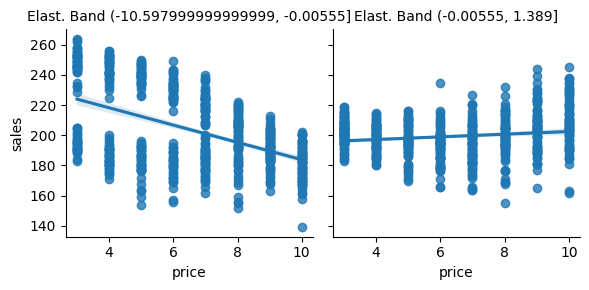

In [11]:
g = sns.FacetGrid(bands_df, col="elast_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Elast. Band {col_name}");

모델 `m3`는 그룹화에 유용해 보입니다. 첫 번째 그룹은 가격 민감도가 높습니다. 가격이 오르면 매출이 많이 떨어집니다. 하지만 두 번째 그룹에서는 가격 인상에 따라 매출이 거의 바뀌지 않습니다. 사실 가격이 오르면서 매출도 증가하는 것처럼 보이는데 노이즈에 의한 것일 겁니다.
 
아래는 기계학습 모델로 만든 결과입니다.

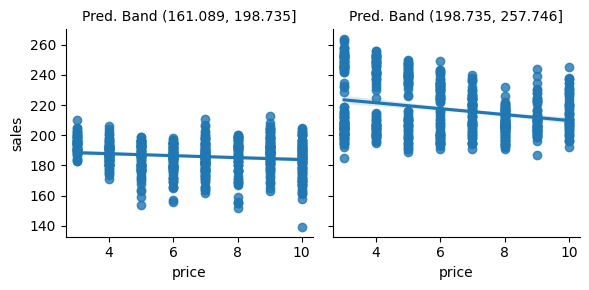

In [12]:
g = sns.FacetGrid(bands_df, col="pred_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Pred. Band {col_name}");

저는 위 그래프가 중요한 사실을 시사하는 점에서 마음에 듭니다. 보시다시피 기계학습 모델은 $y$ 예측값을 기준으로 데이터를 나눕니다. 첫 번째 그룹은 아이스크림을 적게 팔며, 두 번째 그룹은 많이 팝니다. 결과는 매우 놀랍습니다. 매출을 잘 예측하기 때문입니다. 기계학습 모델은 아이스크림 판매량이 적은 날과 높은 날을 구분할 수 있습니다.
 
유일한 문제는 예측값이 유용하지 않다는 것입니다. 우리는 가격을 올릴 수 있는 날을 알고 싶습니다. 하지만 기계학습 모델이 나눈 그룹 내에서 기울기는 크게 변하지 않습니다. 즉, 기계학습 모델의 그룹들은 가격 인상에 반응이 거의 같습니다. 가격이 매출에 영향을 주지 않는 것처럼 보이기 때문에 가격을 올릴 수 있는 날이 언제인지에 대한 정보를 제공하지 못합니다.

## Key Ideas
 
18장에서는 `Conditional Average Treatment Effect`(`CATE`, 조건부 평균 처치 효과)의 개념과 `CATE`를 구할 방법을 공부했습니다. 각 `unit`이 `treatment`에 어떻게 반응하는지 이해할 수 있다면 (처치 효과의 이질성을 이해한다면) `unit`의 특성에 따라 최적으로 처치할 수 있습니다.

또한, 예측 모델로 `CATE`를 구하는 방법을 공부했습니다. $\delta y / \delta t$를 근사함으로써 `CATE`를 추정할 수 있었습니다.
 
안타깝게도 `CATE` 모델을 만드는 방법은 명확하지 않습니다. 탄력성을 직접 구할 수 없기 때문입니다. 선형 회귀를 사용하거나 $Y$를 예측하는 회귀 모델로 $\frac{\delta y}{\delta t}$를 예측하는 방법을 찾았습니다. 모델은 `treatment`와 `feature`간 상호작용을 포함해야 합니다. 모델을 통해 `unit`에 따른 탄력성($E[T'(t) | X]$)을 추정할 수 있었습니다. 탄력성 예측하여 `treatment`에 민감한 그룹을 얻음으로써 궁극적으로 각 그룹의 처치 수준을 결정할 수 있었습니다.

![img](./data/img/causal-model/economists.png)
 
선형 회귀를 일반적인 기계학습 모델로 대체하여 탄력성을 예측할 수 있을까요? 정답은 "그렇다"입니다. 하지만 몇 가지 주의사항이 있습니다. 18장에서는 개념 이해를 위해 간단한 선형 모델로 `CATE`를 추정했습니다. 다음부터는 더 정교한 모델을 살펴보겠습니다. 하지만 그 전에 `CATE` 모델을 어떻게 평가하는지 먼저 공부하겠습니다.
 
## References 
 
The things I've written here are mostly stuff from my head. I've learned them through experience. This means there isn't a direct reference I can point you to. It also means that the things I wrote here have **not** passed the academic scrutiny that good science often goes through. Instead, notice how I'm talking about things that work in practice, but I don't spend too much time explaining why that is the case. It's a sort of science from the streets, if you will. However, I am putting this up for public scrutiny, so, by all means, if you find something preposterous, open an issue and I'll address it to the best of my efforts.
 
## Contribute
 
Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. It uses only free software, based in Python. Its goal is to be accessible monetarily and intellectually.
If you found this book valuable and you want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits or giving feedback on passages you didn't understand. Just go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it useful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).